<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2024notebooks/2024_1011karapetian_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karapetian+ (2023), Empirically Identifying and Computationally Modeling the Brain–Behavior Relationship for Human Scene Categorization, Journal of Cognitive Neuroscience 35:11, pp. 1879–1897, doi:10.1162/jocn_a_02043

データは，https://osf.io/4fdky/ より入手して，駒澤 Gdrive で共有

In [1]:
import torch
import numpy as np
import os
import zipfile
import glob
import PIL
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

basedir = '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian_Stimuli'
fnames = list(sorted(glob.glob(os.path.join(basedir,'*.jpg'))))
#!ls -lht '/content/drive/Shareddrives/#2024認知心理学研究(1)b/浅川先生/2023Karapetian_Stimuli'

Mounted at /content/drive


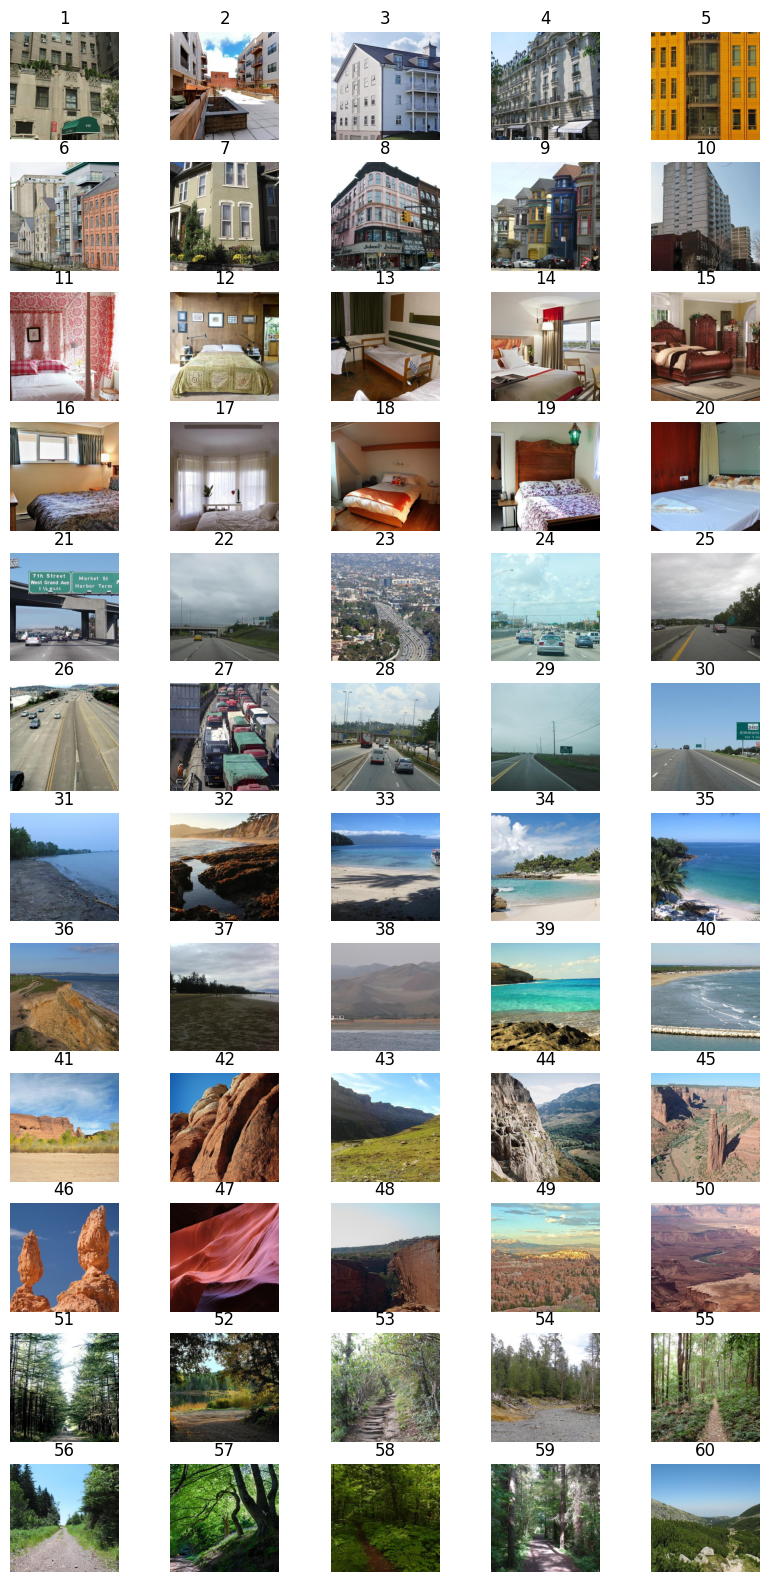

In [1]:
# 刺激画像の表示
nrows, ncols = 12, 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,20))

i=0
for row in range(nrows):
    for col in range(ncols):
        #img = PIL.Image.open(fnames[i]).convert('RGB')
        img = PIL.Image.open(os.path.join(basedir, str(i+1)+'.jpg')).convert('RGB')
        ax[row][col].imshow(img)
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{i+1}')
        i += 1


<Axes: >

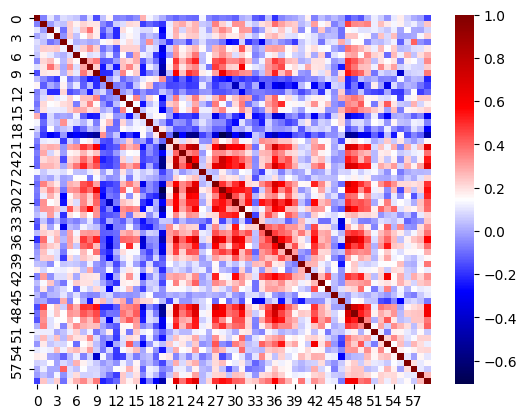

In [18]:
# 画像を相関係数行列として可視化
import seaborn
X = []
for i in range(1,61):
    img = PIL.Image.open(os.path.join(basedir, str(i)+'.jpg'))
    x = np.array(img)
    X.append(x.reshape(-1))

R = np.corrcoef(np.array(X))
seaborn.heatmap(R, cmap='seismic')

<Axes: >

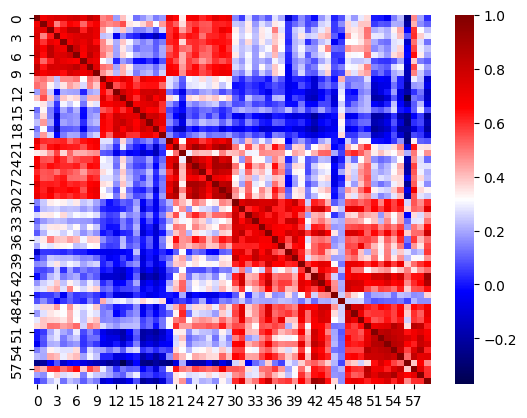

In [19]:
# 深層学習モデルの出力を相関係数行列として可視化
import torchvision.models as models
from torchvision import transforms

Img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

model = models.resnet18(weights="DEFAULT") # .double()

model.eval()
outputs = []
for i in range(1,61):
    img = PIL.Image.open(os.path.join(basedir, str(i)+'.jpg')).convert('RGB')
    _img = Img_transform(img)
    out = model(_img.unsqueeze(0))
    outputs.append(out.detach().numpy()[0])


R = np.corrcoef(np.array(outputs))
seaborn.heatmap(R, cmap='seismic')

In [15]:
outputs[0].shape

(1, 1000)

In [ ]:
#Img_transform(np.array(imgs)[0])
imgs_pt = [Img_transform(img) for img in imgs]
print(type(imgs_pt))

<div class="markdown-google-sans">
  <h1>Colab へようこそ</h1>
</div>

<div class="markdown-google-sans">
  <h2>（新規）Gemini API をお試しください</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


すでに Colab をよくご存じの場合は、この動画でインタラクティブなテーブル、実行されたコードの履歴表示、コマンド パレットについてご覧ください。

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  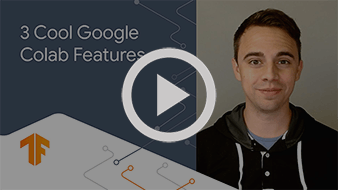
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab とは</h2>
</div>

Colab（正式名称「Colaboratory」）では、ブラウザ上で Python を記述、実行できます。以下の機能を使用できます。
- 環境構築が不要
- GPU に料金なしでアクセス
- 簡単に共有

Colab は、<strong>学生</strong>から<strong>データ サイエンティスト</strong>、<strong>AI リサーチャー</strong>まで、皆さんの作業を効率化します。詳しくは、<a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab の紹介動画</a>をご覧ください。下のリンクからすぐに使ってみることもできます。

<div class="markdown-google-sans">

## <strong>はじめに</strong>
</div>

ご覧になっているこのドキュメントは静的なウェブページではなく、<strong>Colab ノートブック</strong>という、コードを記述して実行できるインタラクティブな環境です。

たとえば次の<strong>コードセル</strong>には、値を計算して変数に保存し、結果を出力する短い Python スクリプトが記述されています。

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

上記のセルのコードを実行するには、セルをクリックして選択し、コードの左側にある実行ボタンをクリックするか、キーボード ショートカット「command+return」または「Ctrl+Enter」を使用します。コードはセルをクリックしてそのまま編集できます。

1 つのセルで定義した変数は、後で他のセルで使用できます。

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab ノートブックを使用すると、<strong>実行可能コード</strong>と<strong>リッチテキスト</strong>（<strong>画像</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> なども可）を 1 つのドキュメントで記述できます。ご自分の Colab ノートブックを作成すると、Google ドライブ アカウントに保存されます。Colab ノートブックは、同僚や友人と簡単に共有し、コメントの記入や編集をしてもらうことができます。詳細については <a href="/notebooks/basic_features_overview.ipynb">Colab の概要</a>をご覧ください。新しい Colab ノートブックを作成するには、上にある &#91;ファイル&#93; メニューを使用するか、<a href="http://colab.research.google.com#create=true">こちら</a>をクリックします。

Colab ノートブックは、Colab がホストする Jupyter ノートブックです。Jupyter プロジェクトの詳細については、<a href="https://www.jupyter.org">jupyter.org</a> をご覧ください。

<div class="markdown-google-sans">

## データ サイエンス
</div>

Colab では、よく使用されている Python ライブラリの機能をフルに活用して、データの分析と可視化を行えます。以下のコードセルでは、<strong>numpy</strong> を使用してランダムデータを生成し、<strong>matplotlib</strong> を使用して可視化しています。コードはセルをクリックしてそのまま編集できます。

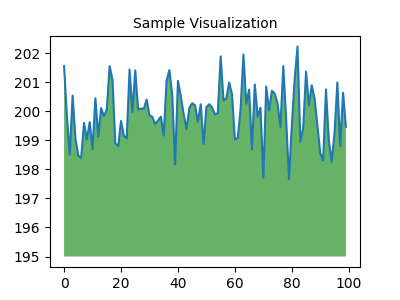

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab ノートブックには、Google ドライブ アカウント（スプレッドシートを含む）からご自分のデータをインポートできます。また、GitHub やその他多くのソースからのインポートも可能です。データのインポートについて、またデータ サイエンスで Colab を使用する方法の詳細については、<a href="#working-with-data">データの操作</a>の下にあるリンクをクリックしてください。

<div class="markdown-google-sans">

## 機械学習
</div>

Colab を使用すると、画像データセットのインポート、画像分類のトレーニング、モデルの評価をすべて<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">数行のコード</a>で実行できます。Colab ノートブックは Google のクラウド サーバーでコードを実行します。そのため、パソコンの性能にかかわらず、<a href="#using-accelerated-hardware">GPU や TPU</a> など Google ハードウェアの優れた機能を活用できます。必要なのはブラウザだけです。

Colab は、次に示す用途を含め、機械学習コミュニティで広く使用されています。
- TensorFlow の導入
- ニューラル ネットワークの開発とトレーニング
- TPU を利用した実験
- AI リサーチの促進
- チュートリアルの作成

Colab ノートブックを機械学習に応用したサンプルについては、以下の<a href="#machine-learning-examples">機械学習の例</a>をご覧ください。

<div class="markdown-google-sans">

## その他のリソース

### Colab でのノートブックの操作

</div>

- [Colaboratory の概要](/notebooks/basic_features_overview.ipynb)
- [markdown のガイド](/notebooks/markdown_guide.ipynb)
- [ライブラリのインポートと依存関係のインストール](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub でのノートブックの保存と読み込み](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [インタラクティブなフォーム](/notebooks/forms.ipynb)
- [インタラクティブなウィジェット](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### データの操作
</div>

- [データの読み込み: ドライブ、スプレッドシート、Google Cloud Storage](/notebooks/io.ipynb)
- [グラフ: データの視覚化](/notebooks/charts.ipynb)
- [BigQuery を使ってみる](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 機械学習の集中講座

<div>

Google の機械学習に関するオンライン コースからいくつかのノートブックをご紹介します。詳しくは、<a href="https://developers.google.com/machine-learning/crash-course/">全コースのウェブサイト</a>をご覧ください。
- [Pandas DataFrame の概要](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [合成データを使用した tf.keras による線形回帰](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### アクセラレータの使用
</div>

- [TensorFlow と GPU](/notebooks/gpu.ipynb)
- [TensorFlow と TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 使用例

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia の NeMo 会話 AI ツールキットを使用して、オーディオ フラグメント内の音声をコンピュータ生成の音声と入れ替えます。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">画像分類の再トレーニング</a>: 事前トレーニング済みの画像分類を再利用して Keras モデルを構築し、花を分類します。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">テキスト分類</a>: IMDB の映画レビューをポジティブ<em></em>なレビューとネガティブ<em></em>なレビューに分類します。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">スタイル転送</a>: ディープ ラーニングを使用して画像間でスタイルを転送します。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder の Q&A</a>: 機械学習モデルを使用して、SQuAD データベースからの質問に回答します。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">動画の補間</a>: 動画の最初のフレームと最後のフレームの間に何か起こったのかを予測します。
